In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np
from sailboat_gym import load_vmc_dict, get_vmc

In [20]:
vmc_dict = load_vmc_dict('SailboatLSAEnv-v0')

In [21]:
def plot_vmcs(thetas, vmcs):
    plt.subplots(figsize=(3, 3), dpi=300)

    # plot VMC
    init_coord = np.array([0, 0])
    coords = init_coord + \
        np.array([np.cos(thetas), np.sin(thetas)]).T * \
        vmcs[:, None] * 100  # meters to cm
    plt.plot(coords[:, 0], coords[:, 1])

    # plot velocities levels
    def fmt(x):
        s = f'{x:.1f}'
        return rf'{s}' if plt.rcParams['text.usetex'] else f'{s}'

    space = np.linspace(coords.min(), coords.max(), 100)
    X, Y = np.meshgrid(space, space)
    Z = (X**2 + Y**2)**0.5  # distance from origin
    CS = plt.contour(X, Y, Z,
                        levels=np.arange(0, max(1, Z.max()), 10), linestyles='dashed')
    plt.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

    # plot wind
    wind_coords = np.array([1, 0])
    x_right = coords.max()
    y_mid = (coords[:, 1].max() + coords[:, 1].min()) / 2
    plt.quiver(x_right, y_mid, *-wind_coords, color='k', scale=5, zorder=10)

    plt.xlim(coords.min()-.2, coords.max()+.2)
    plt.ylim(coords.min()-.2, coords.max()+.2)
    plt.axis('off')

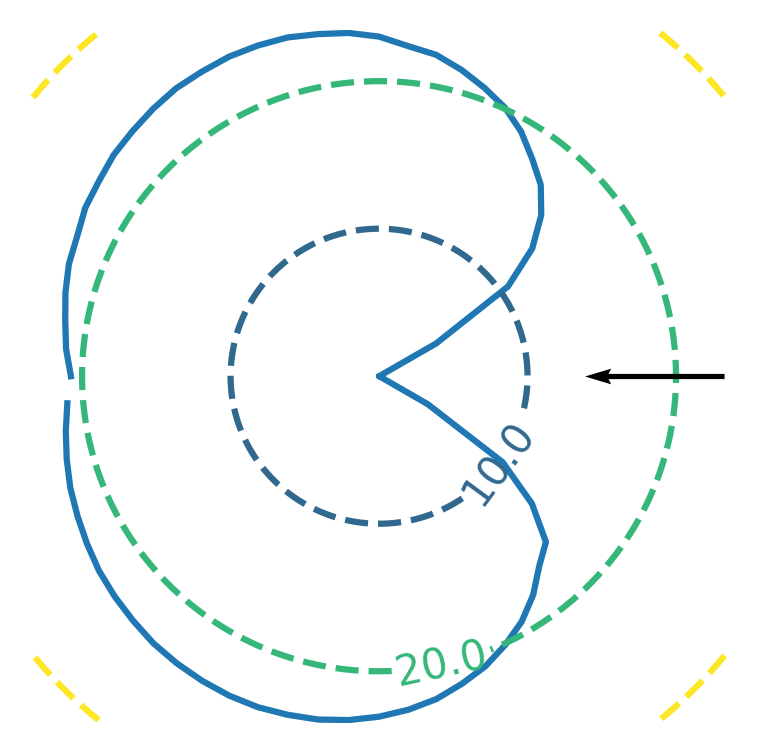

In [22]:
thetas = (-np.array(list(vmc_dict.keys())) + np.pi) % (2 * np.pi)
vmcs = np.array(list(vmc_dict.values()))

plot_vmcs(thetas, vmcs)

In [15]:
thetas = np.deg2rad(np.arange(0, 360, 1))
vmcs = np.array([get_vmc('SailboatLSAEnv-v0', (theta + np.pi) % (2*np.pi)) for theta in thetas])

plot_vmcs(thetas, vmcs)

EOFError: Ran out of input